# En este notebook analizaremos las distintas variables de desarrollo humano en los distintos paises de todos los continentes segun su PIB del año 2005


In [ ]:
#Importemos las librerías con las que trabajaremos
import pandas as pd                             #manipulación y análisis de datos
import numpy as np                              #funciones matematicas, algebralineal
import seaborn as sns                           #creación de graficos
import matplotlib.pyplot as plt                 #importamos librería matplot
import statsmodels.formula.api as smf           #Statsmodels es la biblioteca para realizar modelos

El dataset 'nations', contiene información sobre diferentes atributos de desarrollo humano en 194 países, recolectados por las Naciones Unidas en el año 2005.

* Contiene información a nivel mundial sobre demografía:
    * `country`: País.
    * `region`: Continente del país.
    * `gdp`: Producto Interno Bruto per cápita, precios 2005.
    * `school`: Promedio años de escolaridad.
    * `adfert`: Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19).
    * `chldmort`: Probabilidad de muerte antes de los 5 años por cada 1000.
    * `life`: Esperanza de vida al nacer.
    * `pop`: Población total.
    * `urban`: Porcentaje de población urbana.
    * `femlab`: Tasa entre hombres y mujeres en el mercado laboral.
    * `literacy`: Tasa de alfabetismo.
    * `co2`: Toneladas de Co2 emitidas per cápita.
    * `gini`: Coeficiente de desigualdad del ingreso.



In [ ]:
#cargamos el dataset y lo guardamos en "naciones"
naciones = pd.read_csv("https://raw.githubusercontent.com/DireccionAcademicaADL/Nations-DB/main/nations.csv", encoding="ISO-8859-1")

In [ ]:
naciones

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.00,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.20,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.20,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.20,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.10,33.299999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,190,Samoa,Oceania,4012.600098,10.300000,28.299999,26.75,71.533333,181600,20.666668,0.5010,98.800003,3.10,NaN
190,191,Solomon Islands,Oceania,2249.199951,4.500000,70.300003,36.00,66.500000,503617,17.766666,0.4858,NaN,1.40,NaN
191,192,Tonga,Oceania,4072.199951,10.133333,22.299999,19.25,71.833336,102550,23.266666,0.7150,99.000000,4.85,NaN
192,193,Tuvalu,Oceania,NaN,NaN,23.299999,36.50,66.033333,9767,49.233334,NaN,NaN,NaN,NaN


Se puede apreciar que la columna "Unnamed:  0" parece no tener información relevante, por lo que la eliminaremos.

In [ ]:
naciones.drop(columns=["Unnamed: 0"], inplace = True)     #inplace=true-->elimina sobre el mismo DF en vez de copiar o hacer uno nuevo

In [ ]:
naciones.head(3)

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN


La columna "gdp" se mide en dólares corrientes del año 2005. haremos la conversion a este año 2023 con 1 USD = 813 pesos chilenos.

In [ ]:
naciones["gdp_pesos2023"] = naciones["gdp"]*813
naciones.head(1)

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini,gdp_pesos2023
0,Algeria,Africa,7300.399902,6.716667,7.3,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN,5.935225e+06


##Usaremos describe() para ver las estadisticas del dataset

In [ ]:
naciones.describe()

,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini,gdp_pesos2023
count,179.000000,188.000000,194.000000,193.000000,194.000000,1.940000e+02,194.000000,177.000000,135.000000,185.000000,81.000000,1.790000e+02
mean,12118.739193,7.459220,51.814433,47.650259,68.729295,3.437752e+07,55.434880,0.691606,81.533148,17.885946,40.477778,9.852535e+06
std,13942.341217,2.959589,44.066120,52.809400,10.055404,1.314004e+08,23.439101,0.182871,19.466359,25.670704,8.487874,1.133512e+07
min,279.799988,1.150000,1.000000,2.250000,45.849998,9.767000e+03,10.250000,0.194200,23.600000,0.100000,19.000000,2.274774e+05
25%,2100.300049,5.225000,16.500000,10.250000,63.745833,1.483754e+06,36.325000,0.578200,70.099998,2.250000,34.000000,1.707544e+06
50%,6932.799805,7.950000,39.350000,24.000000,72.183331,6.784909e+06,56.475000,0.730400,89.699997,8.450000,39.700001,5.636366e+06
75%,17576.299805,9.850000,74.375002,69.750000,75.545835,2.225532e+07,73.483334,0.820600,97.699997,25.000000,46.200001,1.428953e+07
max,74906.000000,12.700000,207.100006,209.000000,82.766663,1.324696e+09,100.000000,1.034400,100.000000,210.649994,58.500000,6.089858e+07


##Observamos las caracteristicas del gini: Coeficiente de desigualdad del ingreso.

In [ ]:
naciones["gini"].describe()

count    81.000000
mean     40.477778
std       8.487874
min      19.000000
25%      34.000000
50%      39.700001
75%      46.200001
max      58.500000
Name: gini, dtype: float64

##Contamos la cantidad de paises que tenemos por cada región

In [ ]:
naciones["region"].value_counts()

Africa      52
Asia        49
Europe      43
Americas    35
Oceania     15
Name: region, dtype: int64

In [ ]:
naciones.groupby(["region"])[["country"]].count()

,country
region,
Africa,52
Americas,35
Asia,49
Europe,43
Oceania,15


¿Cuántos países tienen índices de _co2_ mayores a la media?

In [ ]:
naciones["co2_mayor_a_media"] = np.where(naciones["co2"]> naciones["co2"].mean(), 'si', 'no')

In [ ]:
# % de paises que superan la media de valores de CO2
naciones["co2_mayor_a_media"].value_counts('%')

no    0.670103
si    0.329897
Name: co2_mayor_a_media, dtype: float64

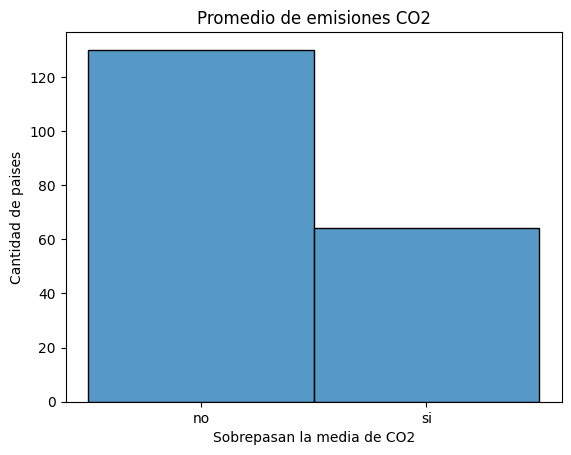

In [ ]:
#Graficamos
sns.histplot(naciones, x="co2_mayor_a_media")
plt.xlabel('Sobrepasan la media de CO2')
plt.ylabel('Cantidad de paises')
plt.title('Promedio de emisiones CO2')
plt.show()

##Separaremos los datos por region para hacer comparaciones

In [ ]:
africa = naciones[naciones["region"]=="Africa"]
europa = naciones[naciones["region"]=="Europe"]
america = naciones[naciones["region"]=="Americas"]
asia = naciones[naciones["region"]=="Asia"]
oceania = naciones[naciones["region"]=="Oceania"]

##comparamos el nivel de alfabetismos por region

In [ ]:
# Guardaremos el valor promedio de alfabetización por región
alf_africa = africa["literacy"].mean()
alf_europa = europa["literacy"].mean()
alf_america = america["literacy"].mean()
alf_asia = asia["literacy"].mean()
alf_oceania = oceania["literacy"].mean()

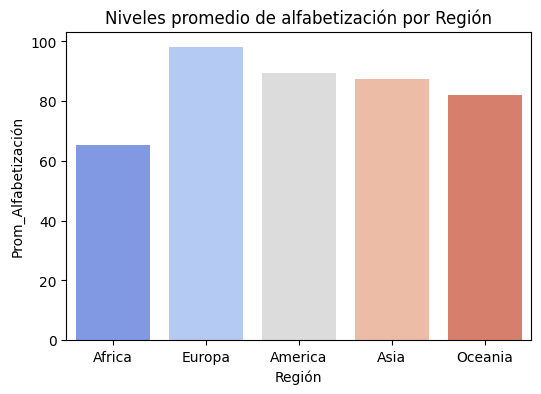

In [ ]:
#Graficamos
regiones = ['Africa','Europa','America', 'Asia', 'Oceania']
medias = [alf_africa,alf_europa,alf_america,alf_asia, alf_oceania]
fig, ax = plt.subplots(figsize = (6, 4))
sns.barplot(x=regiones, y=medias,palette = "coolwarm")
plt.xlabel('Región')
plt.ylabel('Prom_Alfabetización')
plt.title('Niveles promedio de alfabetización por Región')
plt.show()

## Comparamos el GDP(pib) con los años de escolaridad por regiones

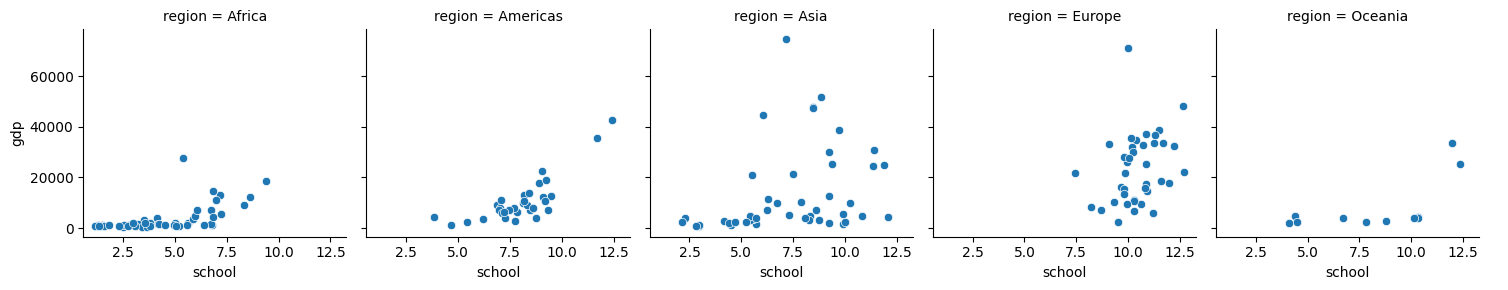

In [ ]:
g = sns.FacetGrid(naciones, col="region")
g.map_dataframe(sns.scatterplot, x="school", y="gdp")
g.add_legend()

## Ahora comparamos el GDP con el nivel de alfabetización

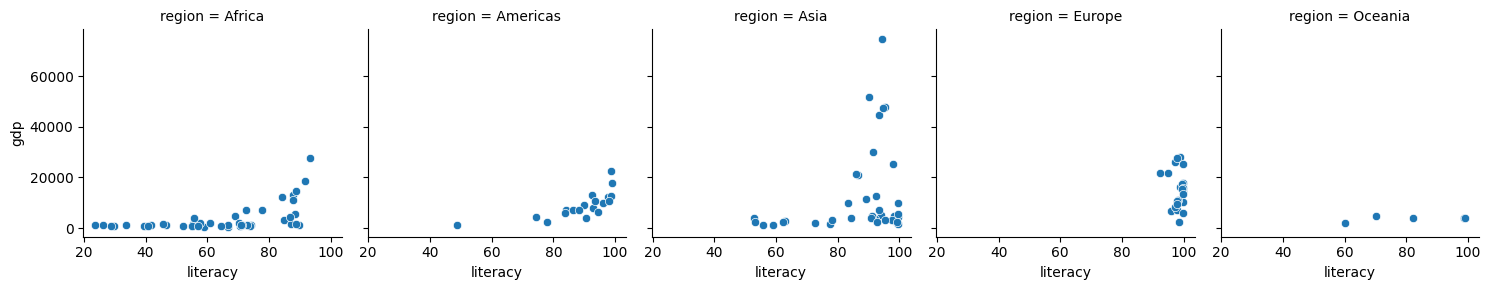

In [ ]:
g = sns.FacetGrid(naciones, col="region")
g.map_dataframe(sns.scatterplot, x="literacy", y="gdp")
g.add_legend()

## Por ultimo comparamos la escolaridad con la alfabetización

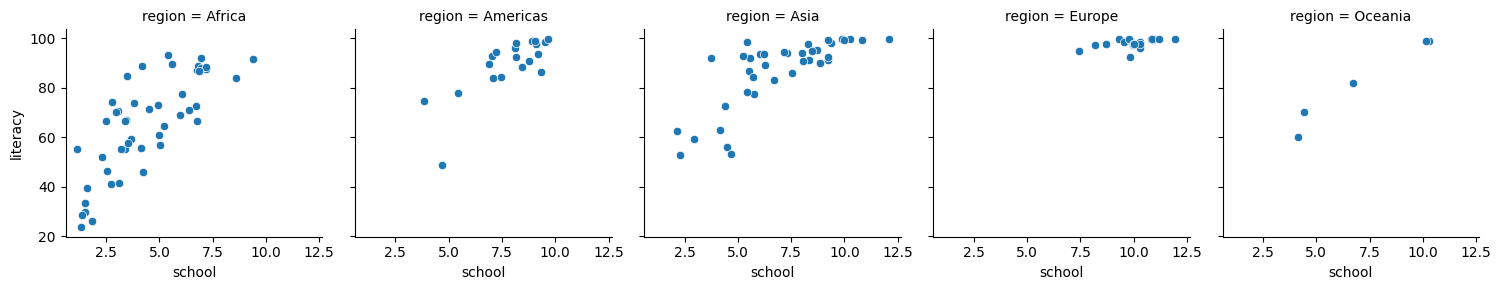

In [ ]:
g = sns.FacetGrid(naciones, col="region")
g.map_dataframe(sns.scatterplot, x="school", y="literacy")
g.add_legend()

## vemos la relacion del GDP con la experanza de vida

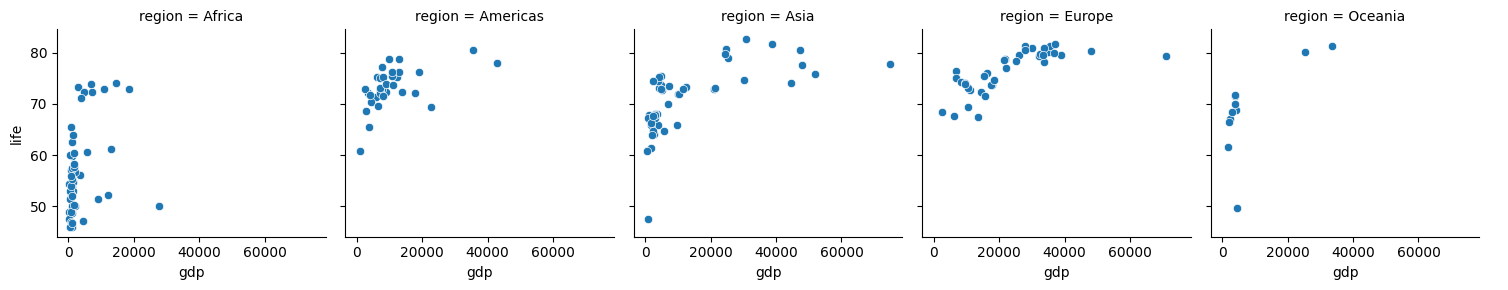

In [ ]:
g = sns.FacetGrid(naciones, col="region")
g.map_dataframe(sns.scatterplot, x="gdp", y="life")
g.add_legend()

##buscamos una correlacion positiva entre nuesras variables

In [ ]:
corr = naciones.corr(numeric_only=True)                       #usamos numeric_only=true para trabajar solo con los valores numericos

<Axes: >

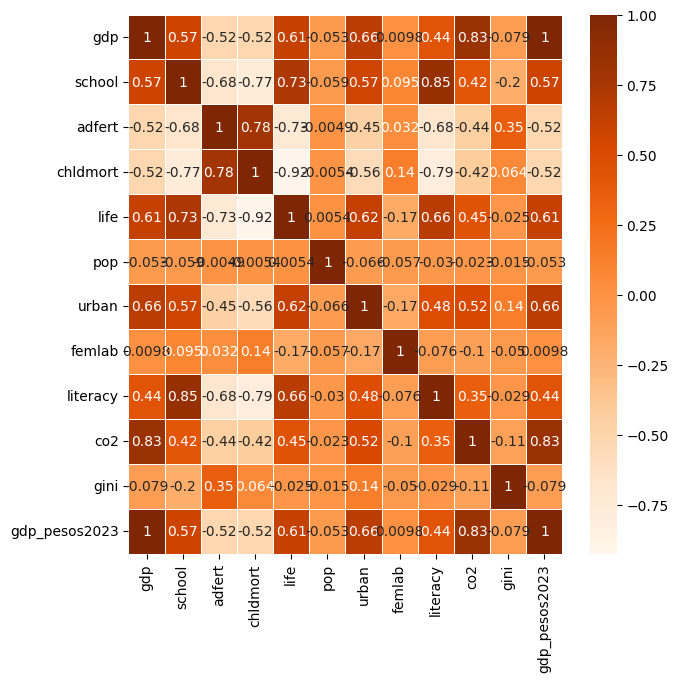

In [ ]:
plt.rcParams["figure.figsize"] =(7,7)                         # ajustamos el tamaño
sns.heatmap(corr, cmap="Oranges", annot=True, linewidth=.5)   #(df, colormap=' ', mostrar valores(true, si es false no se pone)

<Figure size 700x700 with 0 Axes>

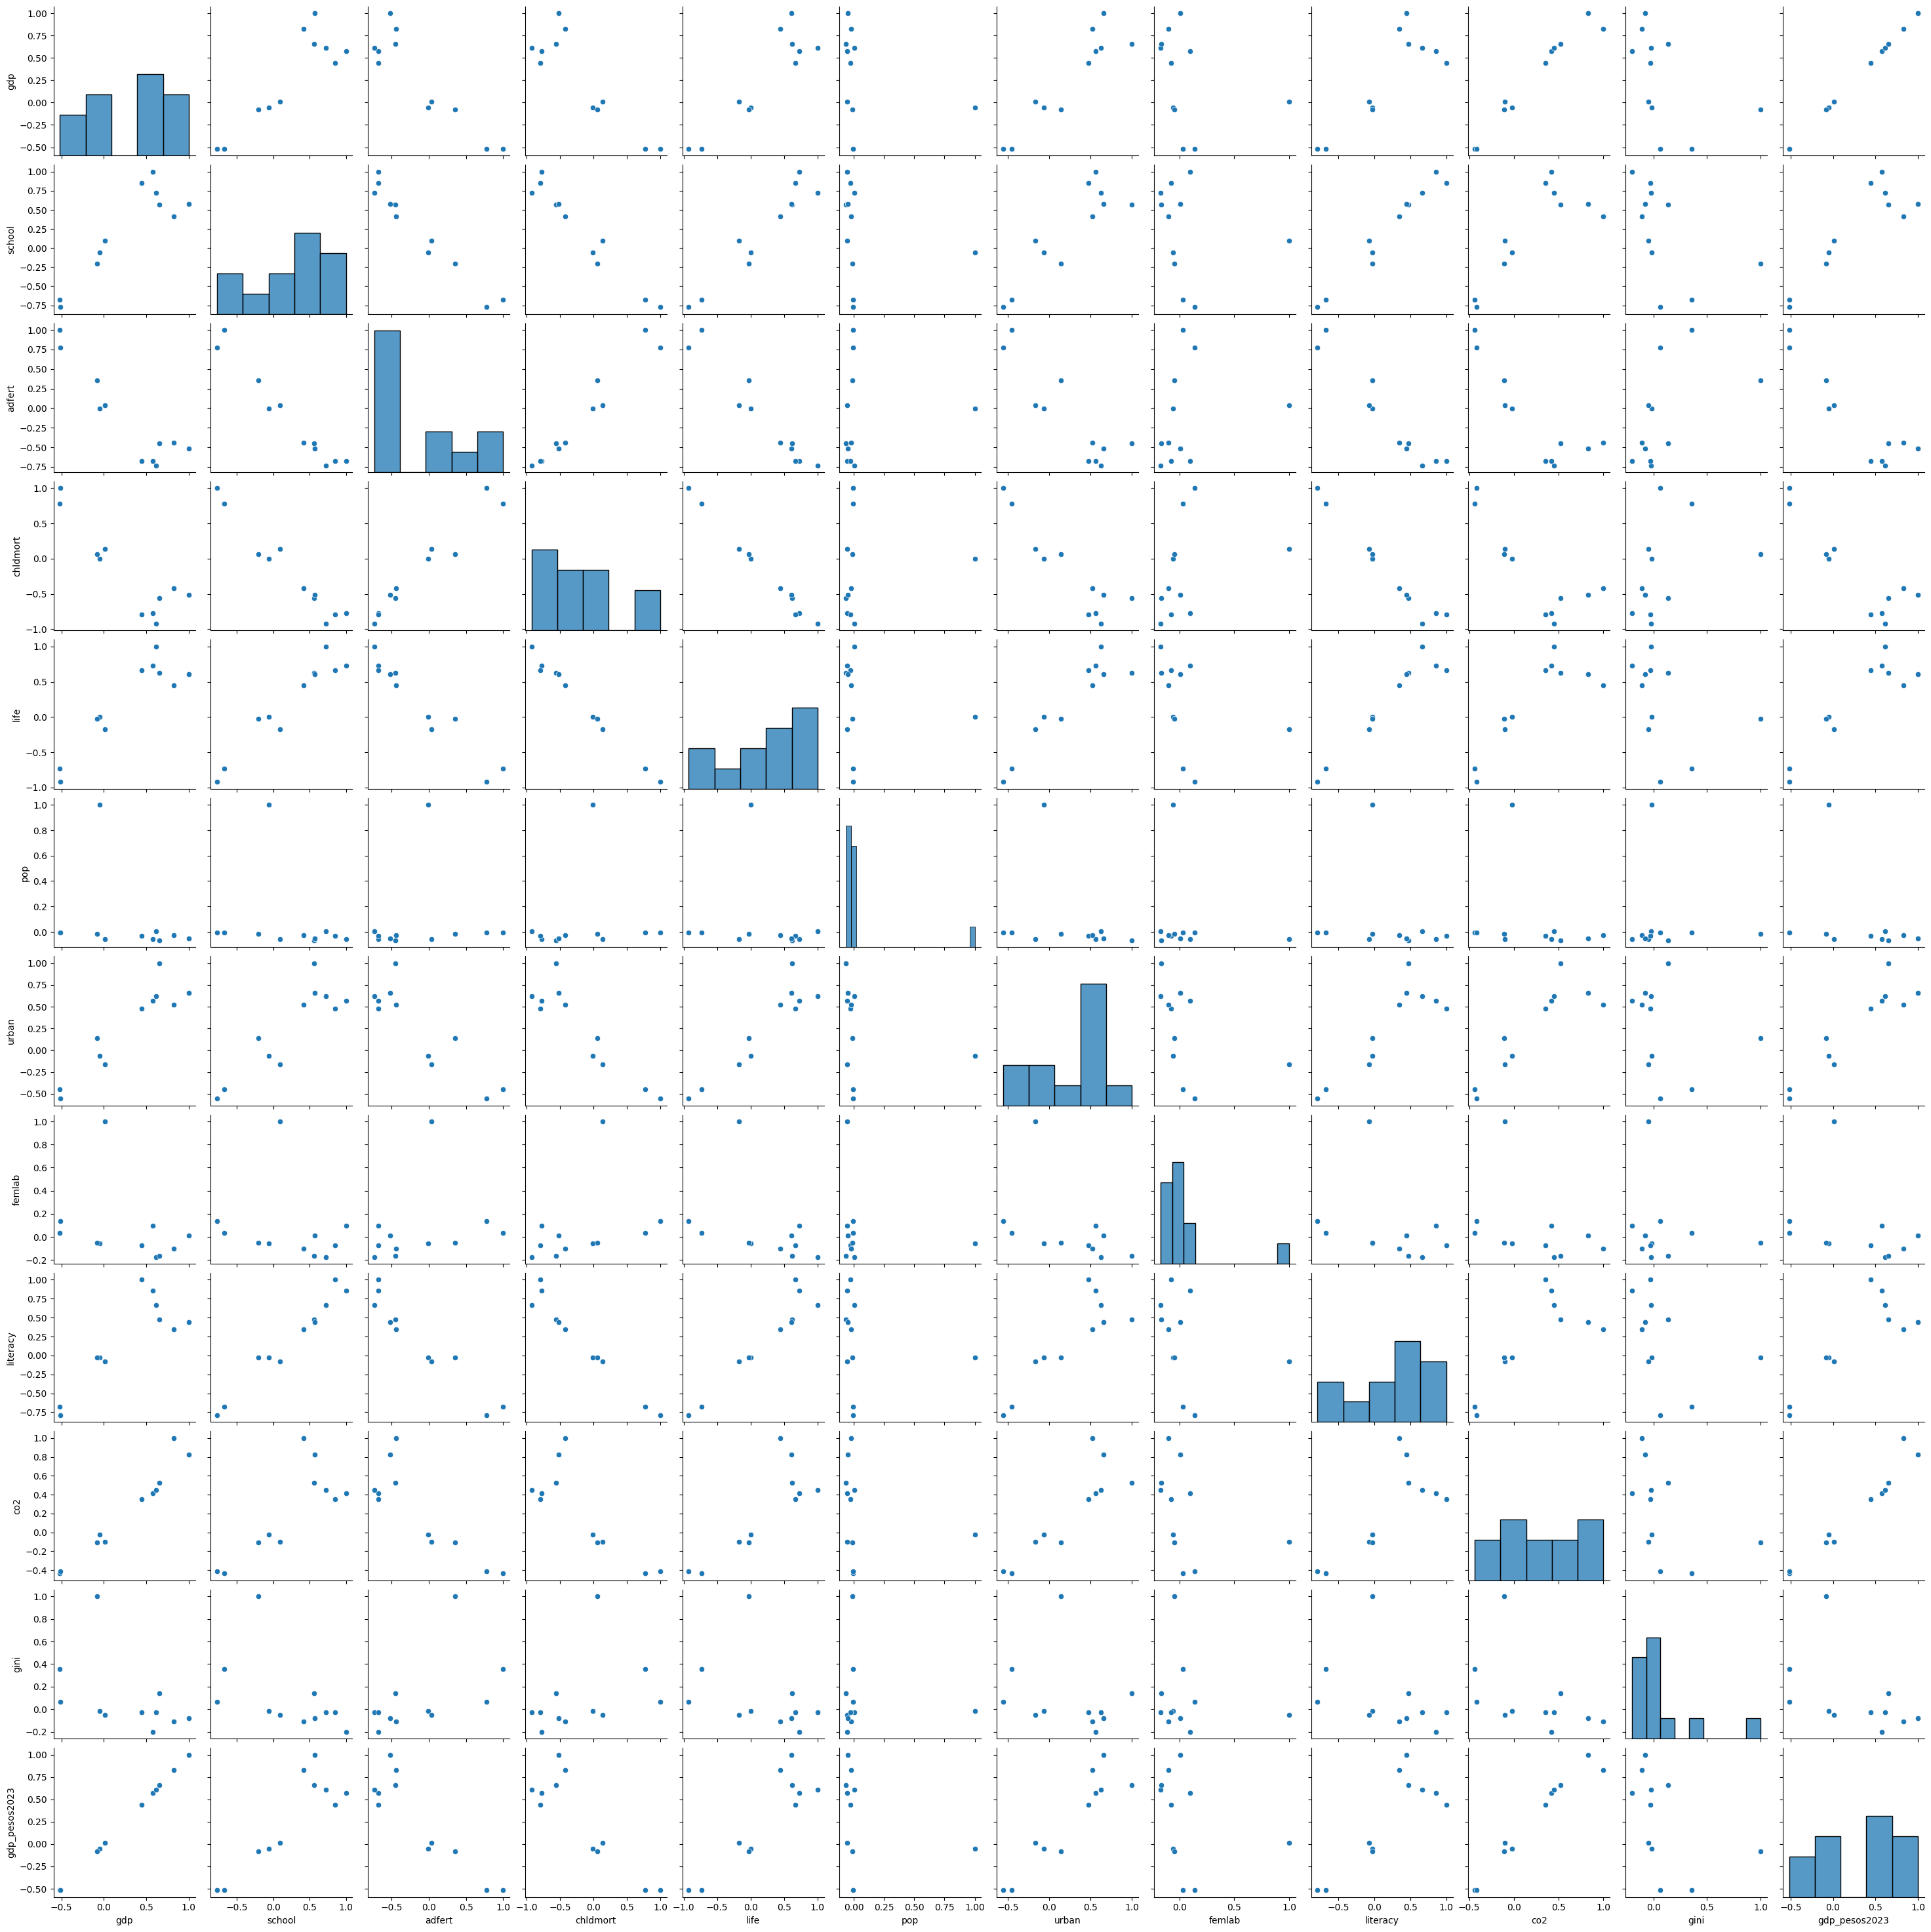

In [ ]:
plt.figure()
sns.pairplot(corr)
plt.show()

##Podemos ver fuertes correlaciones positivas entre el promedio de años de escolaridad y tasa de alfabetización, y  entre PIB per capita y CO2.

## Por último, aplicaremos un modelo de regresión lineal para ver la variabilidad de la variable dependiente, la cual es explicado por la vaiabilidad de las variables independientes

In [ ]:
#planteamos el modelo
modelo1 = smf.ols("gdp ~ co2", data=naciones)

In [ ]:
#Ajustar el modelo utilizando el método .fit()
modelo1 = modelo1.fit()

In [ ]:
# mostramos los resultados del modelo
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gdp   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     373.8
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           4.27e-45
Time:                        20:58:03   Log-Likelihood:                -1818.5
No. Observations:                 175   AIC:                             3641.
Df Residuals:                     173   BIC:                             3647.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4184.3277    730.662      5.727      0.000    2742.168    5626.488
co2          444.9360     23.012     19.335      0.000     399.515     490.357
==============================================================================
Omnibus:                       38.139   Durbin-Watson:                   1.569
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.154
Skew:                           1.038   Prob(JB):                     2.15e-16
Kurtosis:                       5.364   Cond. No.                         38.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

OLS (Mínimos Cuadrados Ordinarios):

Coeficiente de Determinación (R-cuadrado): En este caso, el valor es 0.684, lo que significa que aproximadamente el 68.4% de la variabilidad en el PIB puede explicarse por el modelo. Es decir, las emisiones de CO2 tienen una influencia significativa en el crecimiento económico del país.

R-cuadrado ajustado: Es similar al R-cuadrado, pero tiene en cuenta la cantidad de variables incluidas en el modelo. Un valor de 0.682 sugiere que el modelo sigue siendo efectivo incluso después de ajustar la complejidad del modelo.

F-Estadístico: Es una prueba global de la significancia del modelo en su conjunto. Un F-Estadístico alto (373.8 en este caso) y un valor de probabilidad extremadamente bajo (4.27e-45) indican que el modelo es altamente significativo.

Estadístico AIC y BIC: Estos son criterios de información que miden la bondad de ajuste del modelo. Cuanto menor sea su valor, mejor será el ajuste. En este caso, el AIC es 3641 y el BIC es 3647, lo que sugiere un buen ajuste del modelo.

Coeficientes: El modelo proporciona estimaciones de los coeficientes para el intercepto y la variable independiente "co2". En este caso, el intercepto es 4184.3277, lo que representa el valor estimado del PIB cuando las emisiones de CO2 son cero. El coeficiente de "co2" es 444.9360, lo que indica que, en promedio, un aumento de una unidad en las emisiones de CO2 se asocia con un aumento de 444.9360 en el PIB.

Errores estándar: Estos indican la precisión de las estimaciones de los coeficientes. En este caso, los errores estándar son 730.662 para el intercepto y 23.012 para la variable "co2".

Prueba de Hipótesis: Los valores P (P>|t|) indican si los coeficientes son estadísticamente diferentes de cero. Valores P muy bajos (en este caso, p < 0.001) indican que tanto el intercepto como el coeficiente de "co2" son altamente significativos en el modelo.

Los resultados de la regresión indican que hay una relación significativa y positiva entre las emisiones de CO2 y el PIB. Aproximadamente el 68.4% de la variabilidad en el PIB puede ser explicada por las emisiones de CO2. Sin embargo, es importante tener en cuenta que este análisis se basa en datos específicos y la relación causal entre las variables puede estar influenciada por otros factores que no se han incluido en el modelo.

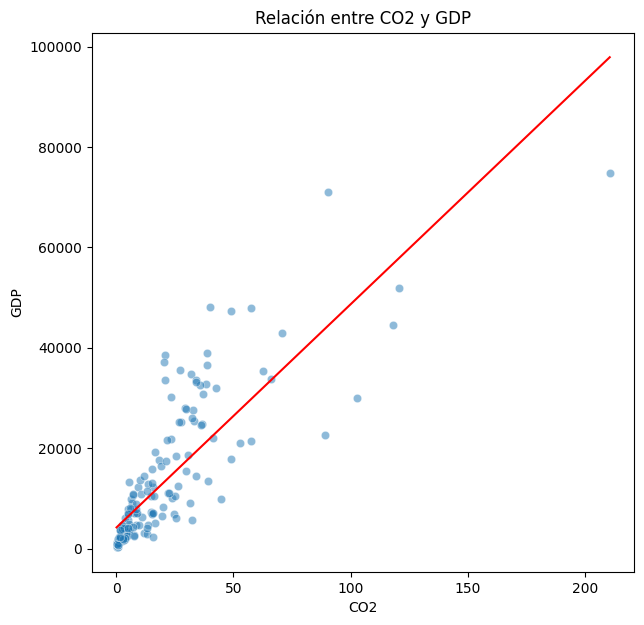

In [ ]:
sns.scatterplot(naciones, x='co2', y='gdp', alpha=0.5)
# Crear la línea de regresión ajustada
x = np.linspace(min(naciones['co2']), max(naciones['co2']), 100)
y = modelo1.params[0] + modelo1.params[1] * x
plt.plot(x, y, color='red')
plt.xlabel('CO2')
plt.ylabel('GDP')
plt.title('Relación entre CO2 y GDP')
plt.show()

##Elaboramos un segundo modelo, ahora con las variables gdp ~ chldmort + life + school + co2"


In [ ]:
modelo2 =smf.ols("gdp ~ chldmort + life + school + co2", data=naciones)

In [ ]:
modelo2 =modelo2.fit()

In [ ]:
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gdp   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     183.1
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           2.58e-60
Time:                        21:02:03   Log-Likelihood:                -1761.3
No. Observations:                 174   AIC:                             3533.
Df Residuals:                     169   BIC:                             3548.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.351e+04   1.03e+04     -7.156      0.000   -9.38e+04   -5.32e+04
chldmort     148.4275     25.793      5.755      0.000      97.510     199.345
life         924.2773    132.239      6.989      0.000     663.223    1185.331
school      1162.4090    247.900      4.689      0.000     673.029    1651.789
co2          359.4860     20.086     17.898      0.000     319.835     399.137
==============================================================================
Omnibus:                       40.607   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.940
Skew:                           1.043   Prob(JB):                     8.02e-20
Kurtosis:                       5.789   Cond. No.                     1.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 Múltiples variables independientes (predictores) para explicar el Producto Interno Bruto (PIB) de un país.

Coeficiente de Determinación (R-cuadrado): El valor de R-cuadrado es 0.813, lo que significa que aproximadamente el 81.3% de la variabilidad en el PIB se puede explicar por las variables incluidas en el modelo. Esto indica que el modelo tiene una muy buena capacidad para explicar las fluctuaciones en el PIB.

R-cuadrado ajustado: El R-cuadrado ajustado es 0.808, lo que sigue siendo alto y sugiere que el modelo es efectivo incluso después de ajustar por la cantidad de variables incluidas.

F-Estadístico: El valor del F-Estadístico es 183.1, y el valor p asociado es extremadamente bajo (2.58e-60), lo que indica que el modelo en su conjunto es altamente significativo.

Coeficientes y Valores P: Cada variable independiente tiene un coeficiente y un valor p asociado que mide su significancia estadística:

Intercepto: El intercepto tiene un valor de -7.351e+04 (aproximadamente -73,510) con un valor p muy bajo (p < 0.001), lo que significa que es estadísticamente significativo y representa el valor estimado del PIB cuando todas las variables independientes son cero.

chldmort: El coeficiente de "chldmort" es 148.4275 con un valor p extremadamente bajo (p < 0.001). Esto sugiere que la tasa de mortalidad infantil (chldmort) tiene un efecto significativo y positivo en el PIB.

life: El coeficiente de "life" es 924.2773 con un valor p muy bajo (p < 0.001). Esto indica que la esperanza de vida (life) también tiene un impacto significativo y positivo en el PIB.

school: El coeficiente de "school" es 1162.4090 con un valor p muy bajo (p < 0.001). Esto significa que la duración promedio de la educación (school) tiene una influencia significativa y positiva en el PIB.

co2: El coeficiente de "co2" es 359.4860 con un valor p extremadamente bajo (p < 0.001). Esto indica que las emisiones de CO2 (co2) tienen un efecto significativo y positivo en el PIB.

Errores estándar: Cada coeficiente tiene un error estándar asociado, que mide la precisión de la estimación. Los errores estándar permiten evaluar la fiabilidad de los coeficientes.

Pruebas de Hipótesis: En este caso, todos los valores p para los coeficientes son muy bajos, lo que indica que todas las variables independientes tienen una asociación significativa con el PIB.

Estadísticas de Residuos: El valor de Durbin-Watson es 1.878, que sugiere que los residuos pueden no estar correlacionados (autocorrelación). El valor de Jarque-Bera es 87.940, lo que indica cierta desviación de la normalidad en los residuos.

Condición Numérica: La alta condición numérica (1.99e+03) sugiere que podría haber problemas de multicolinealidad o problemas numéricos debido a la correlación entre las variables independientes.

Elmodelo muestra que las variables "chldmort", "life", "school" y "co2" tienen una influencia significativa y positiva en el PIB. Alrededor del 81.3% de la variabilidad en el PIB se puede explicar mediante estas variables. Sin embargo, es importante recordar que el análisis de regresión no establece relaciones causales y que otros factores no incluidos en el modelo también pueden influir en el PIB.

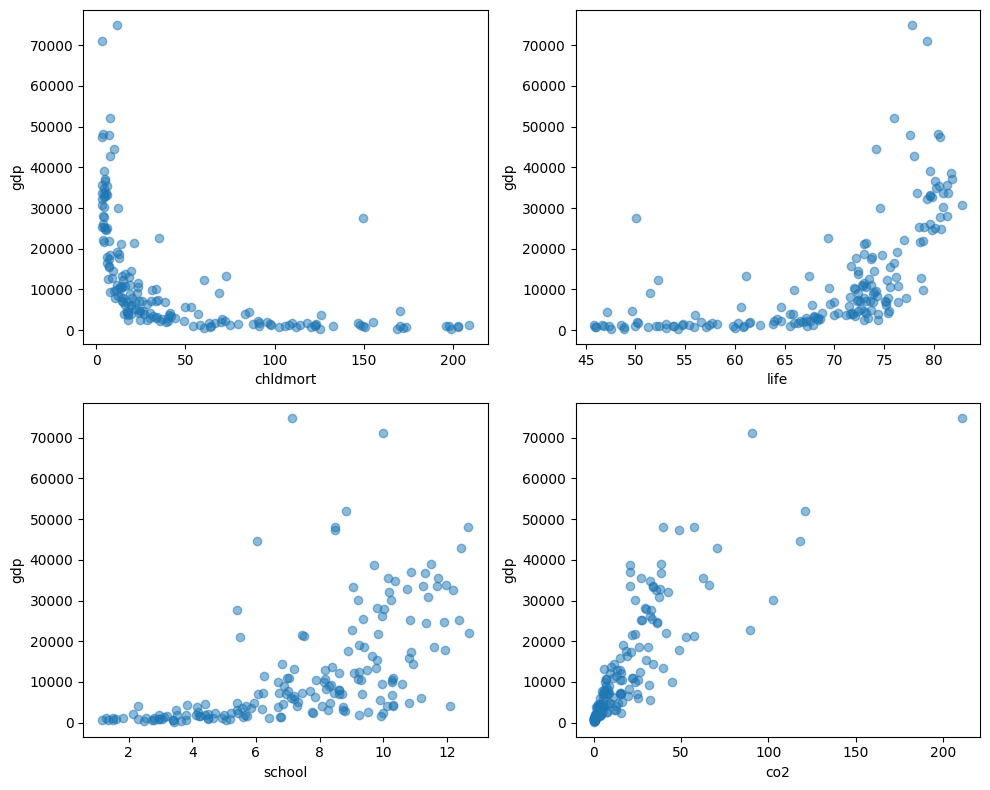

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].scatter(naciones['chldmort'], naciones['gdp'], alpha=0.5)
axs[0, 0].set_xlabel('chldmort')
axs[0, 0].set_ylabel('gdp')

axs[0, 1].scatter(naciones['life'], naciones['gdp'], alpha=0.5)
axs[0, 1].set_xlabel('life')
axs[0, 1].set_ylabel('gdp')

axs[1, 0].scatter(naciones['school'], naciones['gdp'], alpha=0.5)
axs[1, 0].set_xlabel('school')
axs[1, 0].set_ylabel('gdp')

axs[1, 1].scatter(naciones['co2'], naciones['gdp'], alpha=0.5)
axs[1, 1].set_xlabel('co2')
axs[1, 1].set_ylabel('gdp')
plt.tight_layout()   #Ajustamos los gráficos
plt.show()